# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## Contents <a id ="Content" > </a>

## Introduction <a id = 'Introduction'></a>

## Imports <a id="Imports"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
import os
#from sklearn.dummy import DummyRegressor
#from imblearn.over_sampling import SMOTE

In [2]:
ccattr_data = pd.read_csv("../data/3.ccattr_data_EDA_final.csv")

In [3]:
ccattr_data.dtypes

CLIENTNUM                     int64
Attrition_Numeric             int64
Customer_Age                  int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Trans_Amt               int64
Avg_Utilization_Ratio       float64
Gender_Encoded                int64
Dependent_count               int64
Education_Level_sorted       object
Marital_Status_sorted        object
Income_Category_sorted       object
Card_Category_sorted         object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
naive_cls1                  float64
naive_cls2                  float64
dtype: object

In [4]:
ccattr_data.head()

,CLIENTNUM,Attrition_Numeric,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_Encoded,Dependent_count,Education_Level_sorted,Marital_Status_sorted,Income_Category_sorted,Card_Category_sorted,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,naive_cls1,naive_cls2
0,714648933,0,55,4861.0,1123,1556,0.231,1,3,Graduate,Married,0K - 40K,Blue,36,3,2,0,0.000044,0.99996
1,717628608,0,37,2576.0,1640,2568,0.637,0,3,Graduate,Married,60K - 80K,Blue,29,5,1,5,0.000312,0.99969
2,711777633,0,41,5784.0,0,4173,0.000,0,3,Graduate,Divorced,60K - 80K,Blue,27,5,2,2,0.000118,0.99988
3,716645883,0,47,13867.0,0,4297,0.000,0,2,Graduate,Married,60K - 80K,Blue,36,3,2,2,0.000125,0.99987
4,708217758,0,63,14035.0,2061,1606,0.147,0,2,Graduate,Married,60K - 80K,Blue,49,5,2,3,0.000191,0.99981


In [5]:
ccattr_data.shape

(10127, 19)

In [6]:
ccattr_data.head().T

,0,1,2,3,4
CLIENTNUM,714648933,717628608,711777633,716645883,708217758
Attrition_Numeric,0,0,0,0,0
Customer_Age,55,37,41,47,63
Credit_Limit,4861.0,2576.0,5784.0,13867.0,14035.0
Total_Revolving_Bal,1123,1640,0,0,2061
Total_Trans_Amt,1556,2568,4173,4297,1606
Avg_Utilization_Ratio,0.231,0.637,0.0,0.0,0.147
Gender_Encoded,1,0,0,0,0
Dependent_count,3,3,3,2,2
Education_Level_sorted,Graduate,Graduate,Graduate,Graduate,Graduate


In [7]:
ccattr_data.dtypes

CLIENTNUM                     int64
Attrition_Numeric             int64
Customer_Age                  int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Trans_Amt               int64
Avg_Utilization_Ratio       float64
Gender_Encoded                int64
Dependent_count               int64
Education_Level_sorted       object
Marital_Status_sorted        object
Income_Category_sorted       object
Card_Category_sorted         object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
naive_cls1                  float64
naive_cls2                  float64
dtype: object

In [8]:
# Label Encode categorical variables 

#marital_status = {'Married':1,'Single':2, 'Divorced':3}
#ccattr_data['Marital_Status_sorted']=ccattr_data['Marital_Status_sorted'].map(marital_status)

education = {'Uneducated':1,'High School':2, 'Graduate':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6}
ccattr_data['Education_Level_sorted']=ccattr_data['Education_Level_sorted'].map(education)

income = {'0K - 40K':1,'40k − 60K':2, '80K - 120K':3, '60K - 80K':4, '120K +':5}
ccattr_data['Income_Category_sorted']=ccattr_data['Income_Category_sorted'].map(income)

cc_cat = {'Blue':1,'Silver':2, 'Gold':3, 'Platinum':4}
ccattr_data['Card_Category_sorted']=ccattr_data['Card_Category_sorted'].map(cc_cat)


In [9]:
#Checking that no column has missing values 
ccattr_data.isnull().sum()

CLIENTNUM                   0
Attrition_Numeric           0
Customer_Age                0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Trans_Amt             0
Avg_Utilization_Ratio       0
Gender_Encoded              0
Dependent_count             0
Education_Level_sorted      0
Marital_Status_sorted       0
Income_Category_sorted      0
Card_Category_sorted        0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
naive_cls1                  0
naive_cls2                  0
dtype: int64

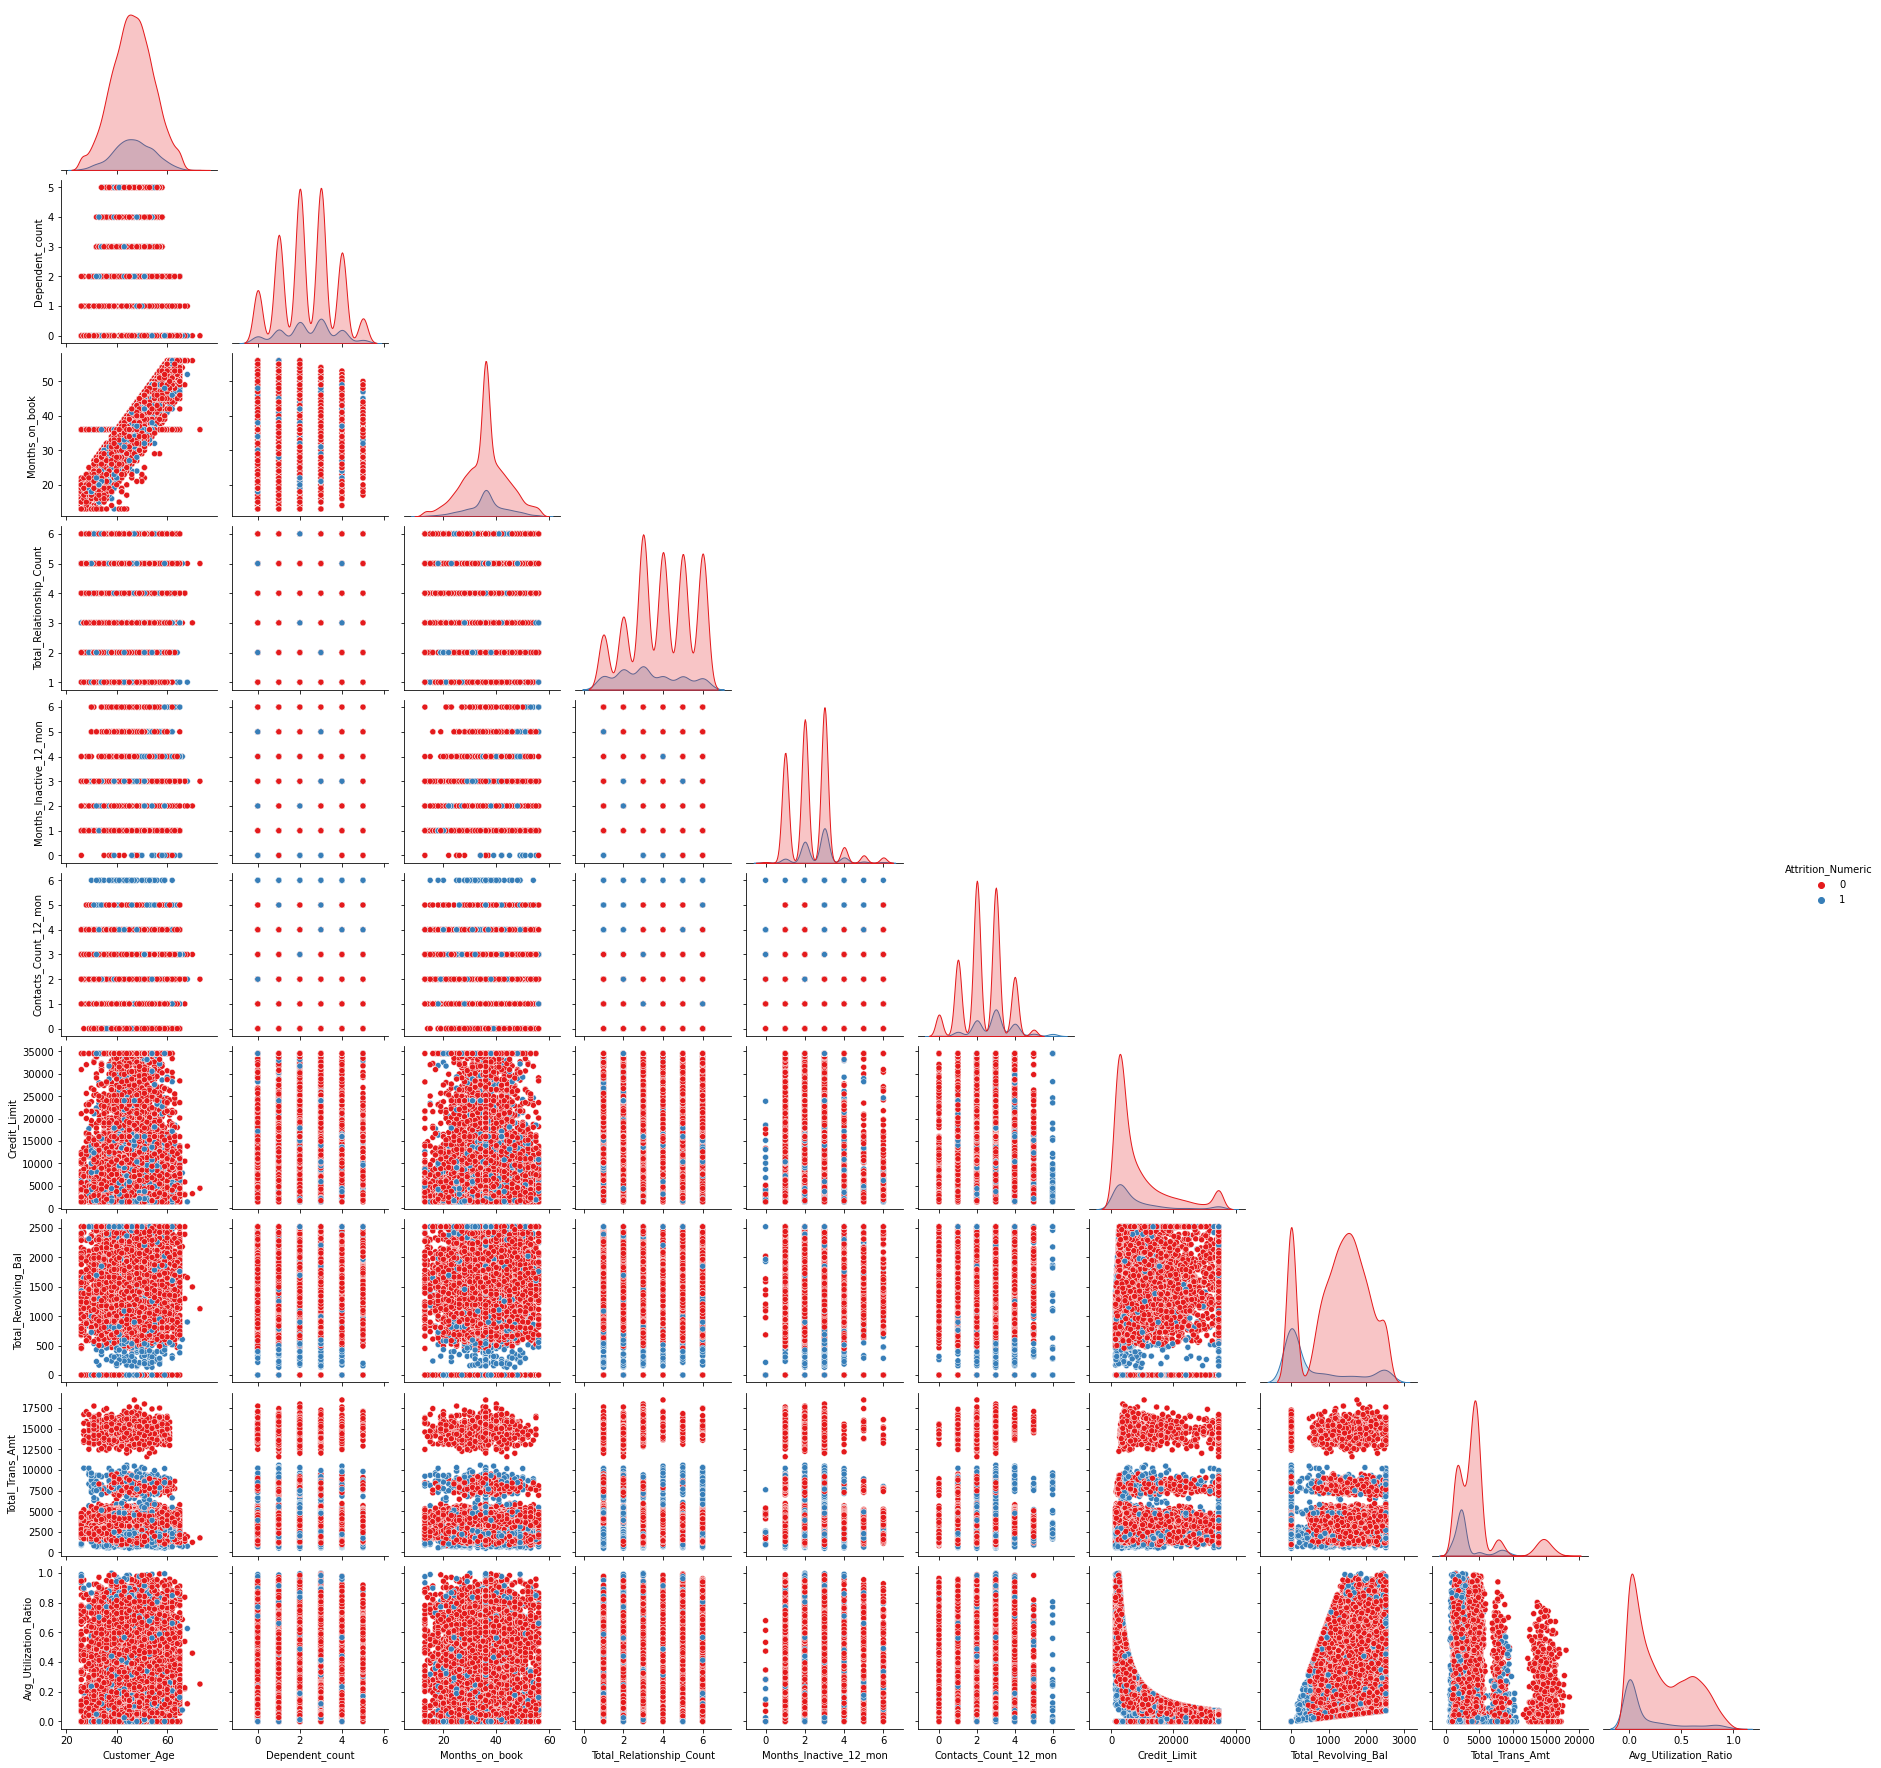

In [10]:
#Corralation

list_cols = ['Attrition_Numeric','Customer_Age','Dependent_count', 'Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
              'Total_Trans_Amt','Avg_Utilization_Ratio']
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(ccattr_data[list_cols], hue="Attrition_Numeric",corner=True)
plt.show()

Looking at the plot it is evident that classifiers are the best models than the linear regressor.

## Pre-Processing

In [11]:
# Creating X and y
X = ccattr_data.drop(['Attrition_Numeric','CLIENTNUM','naive_cls1','naive_cls2'],axis=1)
y = ccattr_data['Attrition_Numeric']

In [12]:
## Converting the data type of categorical features to 'category'
'''cat_cols = ['Attrition_Numeric','Gender', 'Education_Level_sorted', 'Marital_Status_sorted', 'Income_Category_sorted', 'Card_Category_sorted','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']'''

#cat_cols = ['Marital_Status_sorted']
#ccattr_data[cat_cols] = ccattr_data[cat_cols].astype('category')
ccattr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Numeric         10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Credit_Limit              10127 non-null  float64
 4   Total_Revolving_Bal       10127 non-null  int64  
 5   Total_Trans_Amt           10127 non-null  int64  
 6   Avg_Utilization_Ratio     10127 non-null  float64
 7   Gender_Encoded            10127 non-null  int64  
 8   Dependent_count           10127 non-null  int64  
 9   Education_Level_sorted    10127 non-null  int64  
 10  Marital_Status_sorted     10127 non-null  object 
 11  Income_Category_sorted    10127 non-null  int64  
 12  Card_Category_sorted      10127 non-null  int64  
 13  Months_on_book            10127 non-null  int64  
 14  Total_

In [13]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_Encoded,Dependent_count,Education_Level_sorted,Income_Category_sorted,Card_Category_sorted,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Marital_Status_sorted_Married,Marital_Status_sorted_Single
0,55,4861.0,1123,1556,0.231,1,3,3,1,1,36,3,2,0,1,0
1,37,2576.0,1640,2568,0.637,0,3,3,4,1,29,5,1,5,1,0
2,41,5784.0,0,4173,0.000,0,3,3,4,1,27,5,2,2,0,0
3,47,13867.0,0,4297,0.000,0,2,3,4,1,36,3,2,2,1,0
4,63,14035.0,2061,1606,0.147,0,2,3,4,1,49,5,2,3,1,0


In [14]:
X.describe()

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_Encoded,Dependent_count,Education_Level_sorted,Income_Category_sorted,Card_Category_sorted,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Marital_Status_sorted_Married,Marital_Status_sorted_Single
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,8631.953698,1162.814061,4404.086304,0.274894,0.529081,2.346203,2.843093,2.182384,1.083638,35.928409,3.812580,2.341167,2.455317,0.536783,0.389355
std,8.016814,9088.776650,814.987335,3397.129254,0.275691,0.499178,1.298908,1.210906,1.334087,0.333784,7.986416,1.554408,1.010622,1.106225,0.498670,0.487628
min,26.000000,1438.300000,0.000000,510.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,2555.000000,359.000000,2155.500000,0.023000,0.000000,1.000000,2.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,0.000000,0.000000
50%,46.000000,4549.000000,1276.000000,3899.000000,0.176000,1.000000,2.000000,3.000000,2.000000,1.000000,36.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,52.000000,11067.500000,1784.000000,4741.000000,0.503000,1.000000,3.000000,3.000000,3.000000,1.000000,40.000000,5.000000,3.000000,3.000000,1.000000,1.000000
max,73.000000,34516.000000,2517.000000,18484.000000,0.999000,1.000000,5.000000,6.000000,5.000000,4.000000,56.000000,6.000000,6.000000,6.000000,1.000000,1.000000


In [15]:
X.dtypes

Customer_Age                       int64
Credit_Limit                     float64
Total_Revolving_Bal                int64
Total_Trans_Amt                    int64
Avg_Utilization_Ratio            float64
Gender_Encoded                     int64
Dependent_count                    int64
Education_Level_sorted             int64
Income_Category_sorted             int64
Card_Category_sorted               int64
Months_on_book                     int64
Total_Relationship_Count           int64
Months_Inactive_12_mon             int64
Contacts_Count_12_mon              int64
Marital_Status_sorted_Married      uint8
Marital_Status_sorted_Single       uint8
dtype: object

All of the data are Numeric and ready for scaling

## Train Test Split <a id=Train_Test_Split></a>

In [16]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((7088, 16), (3039, 16))

In [17]:
y_train.shape, y_test.shape

((7088,), (3039,))

In [18]:
X_trained_df = X_train.copy()
X_test_df = X_test.copy()

In [19]:
X_trained_df.head()

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_Encoded,Dependent_count,Education_Level_sorted,Income_Category_sorted,Card_Category_sorted,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Marital_Status_sorted_Married,Marital_Status_sorted_Single
4410,42,30117.0,2129,7930,0.071,0,3,3,3,1,36,1,1,2,1,0
4930,42,3964.0,1218,4580,0.307,1,2,2,1,1,31,3,5,2,1,0
1335,46,1912.0,1172,4841,0.613,1,4,3,2,1,37,6,4,2,1,0
6267,36,14304.0,699,4746,0.049,1,2,1,1,1,36,3,2,1,0,0
2413,59,4241.0,0,1798,0.000,0,0,3,2,1,53,3,2,3,1,0


## Applying Scaling, found best from EDA

In [20]:
#zScore scaling for Customer_Age,Months_on_book
#zScore scaling function
def calczScore(ccdf,col_name):
    df =ccdf.copy()
    col_mean = df[col_name].mean()
    col_std = df[col_name].std(ddof=0)
    df[col_name] = (df[col_name]-col_mean)/col_std
    return df

In [21]:
zScoreCol={"Customer_Age","Months_on_book"}
for col in zScoreCol:
    X_trained_df[col] = calczScore( X_trained_df,col)

In [22]:
X_trained_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_Encoded,Dependent_count,Education_Level_sorted,Income_Category_sorted,Card_Category_sorted,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Marital_Status_sorted_Married,Marital_Status_sorted_Single
4410,-0.536671,30117.0,2129,7930,0.071,0,3,3,3,1,-0.536671,1,1,2,1,0
4930,-0.536671,3964.0,1218,4580,0.307,1,2,2,1,1,-0.536671,3,5,2,1,0
1335,-0.038008,1912.0,1172,4841,0.613,1,4,3,2,1,-0.038008,6,4,2,1,0
6267,-1.284665,14304.0,699,4746,0.049,1,2,1,1,1,-1.284665,3,2,1,0,0
2413,1.582646,4241.0,0,1798,0.000,0,0,3,2,1,1.582646,3,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,-1.035334,4043.0,2517,2600,0.623,0,2,1,5,1,-1.035334,6,3,4,0,1
9425,-1.907994,4712.0,955,2568,0.203,1,0,1,1,1,-1.907994,4,3,4,0,1
9816,-0.910668,34516.0,796,7721,0.023,0,2,1,5,2,-0.910668,2,1,2,1,0
1890,0.086657,14241.0,2081,1581,0.146,1,4,1,2,1,0.086657,3,1,3,1,0


In [23]:
#Applying zScore on x_test
zScoreCol={"Customer_Age","Months_on_book"}
for col in zScoreCol:
    X_test_df[col] = calczScore(X_test_df,col)

In [24]:
X_test_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_Encoded,Dependent_count,Education_Level_sorted,Income_Category_sorted,Card_Category_sorted,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Marital_Status_sorted_Married,Marital_Status_sorted_Single
7500,0.202997,3594.0,1996,14881,0.555,1,2,3,1,1,0.202997,3,3,2,0,1
1238,-2.170683,5988.0,660,10211,0.110,0,0,2,2,1,-2.170683,6,3,1,0,1
8327,-2.045753,3450.0,2517,2545,0.730,1,1,4,1,1,-2.045753,4,3,0,0,1
682,0.327927,18584.0,2517,1330,0.135,0,3,1,4,1,0.327927,3,2,2,0,1
1791,-2.545475,1612.0,835,2148,0.518,1,0,3,2,1,-2.545475,6,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,-0.296725,5826.0,0,3756,0.000,1,4,3,1,1,-0.296725,4,3,3,1,0
3728,0.702719,9137.0,1729,4626,0.189,0,3,3,4,1,0.702719,4,2,2,0,1
9122,0.327927,1993.0,0,4075,0.000,1,5,1,1,1,0.327927,3,2,2,0,1
6710,-0.171795,7231.0,1047,15571,0.145,0,4,3,1,1,-0.171795,1,2,3,1,0


In [25]:
# applying div median on Total_Revolving_Bal
col_median = X_trained_df['Total_Revolving_Bal'].median()
X_trained_df['Total_Revolving_Bal'] = X_trained_df['Total_Revolving_Bal']/col_median   
X_trained_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_Encoded,Dependent_count,Education_Level_sorted,Income_Category_sorted,Card_Category_sorted,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Marital_Status_sorted_Married,Marital_Status_sorted_Single
4410,-0.536671,30117.0,1.672427,7930,0.071,0,3,3,3,1,-0.536671,1,1,2,1,0
4930,-0.536671,3964.0,0.956795,4580,0.307,1,2,2,1,1,-0.536671,3,5,2,1,0
1335,-0.038008,1912.0,0.920660,4841,0.613,1,4,3,2,1,-0.038008,6,4,2,1,0
6267,-1.284665,14304.0,0.549097,4746,0.049,1,2,1,1,1,-1.284665,3,2,1,0,0
2413,1.582646,4241.0,0.000000,1798,0.000,0,0,3,2,1,1.582646,3,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,-1.035334,4043.0,1.977219,2600,0.623,0,2,1,5,1,-1.035334,6,3,4,0,1
9425,-1.907994,4712.0,0.750196,2568,0.203,1,0,1,1,1,-1.907994,4,3,4,0,1
9816,-0.910668,34516.0,0.625295,7721,0.023,0,2,1,5,2,-0.910668,2,1,2,1,0
1890,0.086657,14241.0,1.634721,1581,0.146,1,4,1,2,1,0.086657,3,1,3,1,0


In [26]:
# applying div median on Total_Revolving_Bal for x_test
col_median = X_test_df['Total_Revolving_Bal'].median()
X_test_df['Total_Revolving_Bal'] = X_test_df['Total_Revolving_Bal']/col_median   
X_test_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_Encoded,Dependent_count,Education_Level_sorted,Income_Category_sorted,Card_Category_sorted,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Marital_Status_sorted_Married,Marital_Status_sorted_Single
7500,0.202997,3594.0,1.555729,14881,0.555,1,2,3,1,1,0.202997,3,3,2,0,1
1238,-2.170683,5988.0,0.514419,10211,0.110,0,0,2,2,1,-2.170683,6,3,1,0,1
8327,-2.045753,3450.0,1.961808,2545,0.730,1,1,4,1,1,-2.045753,4,3,0,0,1
682,0.327927,18584.0,1.961808,1330,0.135,0,3,1,4,1,0.327927,3,2,2,0,1
1791,-2.545475,1612.0,0.650818,2148,0.518,1,0,3,2,1,-2.545475,6,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,-0.296725,5826.0,0.000000,3756,0.000,1,4,3,1,1,-0.296725,4,3,3,1,0
3728,0.702719,9137.0,1.347623,4626,0.189,0,3,3,4,1,0.702719,4,2,2,0,1
9122,0.327927,1993.0,0.000000,4075,0.000,1,5,1,1,1,0.327927,3,2,2,0,1
6710,-0.171795,7231.0,0.816056,15571,0.145,0,4,3,1,1,-0.171795,1,2,3,1,0


In [27]:
#Applying log scaling
log_col=  ["Credit_Limit","Total_Trans_Amt"]
for col in log_col:
    X_trained_df[col] = np.log(X_trained_df[col])
X_trained_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_Encoded,Dependent_count,Education_Level_sorted,Income_Category_sorted,Card_Category_sorted,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Marital_Status_sorted_Married,Marital_Status_sorted_Single
4410,-0.536671,10.312845,1.672427,8.978408,0.071,0,3,3,3,1,-0.536671,1,1,2,1,0
4930,-0.536671,8.285009,0.956795,8.429454,0.307,1,2,2,1,1,-0.536671,3,5,2,1,0
1335,-0.038008,7.555905,0.920660,8.484877,0.613,1,4,3,2,1,-0.038008,6,4,2,1,0
6267,-1.284665,9.568294,0.549097,8.465057,0.049,1,2,1,1,1,-1.284665,3,2,1,0,0
2413,1.582646,8.352554,0.000000,7.494430,0.000,0,0,3,2,1,1.582646,3,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,-1.035334,8.304742,1.977219,7.863267,0.623,0,2,1,5,1,-1.035334,6,3,4,0,1
9425,-1.907994,8.457868,0.750196,7.850883,0.203,1,0,1,1,1,-1.907994,4,3,4,0,1
9816,-0.910668,10.449178,0.625295,8.951699,0.023,0,2,1,5,2,-0.910668,2,1,2,1,0
1890,0.086657,9.563880,1.634721,7.365813,0.146,1,4,1,2,1,0.086657,3,1,3,1,0


In [28]:
#Applying log scaling for x_test
log_col=  ["Credit_Limit","Total_Trans_Amt"]
for col in log_col:
    X_test_df[col] = np.log(X_test_df[col])
X_test_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_Encoded,Dependent_count,Education_Level_sorted,Income_Category_sorted,Card_Category_sorted,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Marital_Status_sorted_Married,Marital_Status_sorted_Single
7500,0.202997,8.187021,1.555729,9.607841,0.555,1,2,3,1,1,0.202997,3,3,2,0,1
1238,-2.170683,8.697513,0.514419,9.231221,0.110,0,0,2,2,1,-2.170683,6,3,1,0,1
8327,-2.045753,8.146130,1.961808,7.841886,0.730,1,1,4,1,1,-2.045753,4,3,0,0,1
682,0.327927,9.830056,1.961808,7.192934,0.135,0,3,1,4,1,0.327927,3,2,2,0,1
1791,-2.545475,7.385231,0.650818,7.672292,0.518,1,0,3,2,1,-2.545475,6,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,-0.296725,8.670086,0.000000,8.231110,0.000,1,4,3,1,1,-0.296725,4,3,3,1,0
3728,0.702719,9.120087,1.347623,8.439448,0.189,0,3,3,4,1,0.702719,4,2,2,0,1
9122,0.327927,7.597396,0.000000,8.312626,0.000,1,5,1,1,1,0.327927,3,2,2,0,1
6710,-0.171795,8.886133,0.816056,9.653165,0.145,0,4,3,1,1,-0.171795,1,2,3,1,0


In [29]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 7500 to 8592
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   3039 non-null   float64
 1   Credit_Limit                   3039 non-null   float64
 2   Total_Revolving_Bal            3039 non-null   float64
 3   Total_Trans_Amt                3039 non-null   float64
 4   Avg_Utilization_Ratio          3039 non-null   float64
 5   Gender_Encoded                 3039 non-null   int64  
 6   Dependent_count                3039 non-null   int64  
 7   Education_Level_sorted         3039 non-null   int64  
 8   Income_Category_sorted         3039 non-null   int64  
 9   Card_Category_sorted           3039 non-null   int64  
 10  Months_on_book                 3039 non-null   float64
 11  Total_Relationship_Count       3039 non-null   int64  
 12  Months_Inactive_12_mon         3039 non-null 

In [30]:
# Save the data 
datapath = '../data'

datapath_step4 = os.path.join(datapath, '4.X_train.csv')
X_trained_df.to_csv(datapath_step4, index=False)

datapath_step4 = os.path.join(datapath, '4.y_train.csv')
y_train.to_csv(datapath_step4, index=False)

datapath_step4 = os.path.join(datapath, '4.X_test.csv')
X_test_df.to_csv(datapath_step4, index=False)

datapath_step4 = os.path.join(datapath, '4.y_test.csv')
y_test.to_csv(datapath_step4, index=False)